# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

print(my_btc)
print(my_eth)

1.2
5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"



In [5]:
# Fetch current BTC price
response_btc = requests.get(btc_url)

# Fetch current ETH price
response_eth = requests.get(eth_url)

# Compute current value of my crpto
btc_data = response_btc.json()
eth_data = response_eth.json()

btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Print current crypto wallet balance

btc_value = my_btc * btc_price
eth_value = my_eth * eth_price
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $31508.40
The current value of your 5.3 ETH is $8406.75


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key, 
    alpaca_secret_key, 
    api_version="v2")


In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2023-09-21", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

print(df_portfolio)


# Reorganize the DataFrame
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)




# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Preview DataFrame
df_portfolio.head()

                            open      high     low   close     volume  \
timestamp                                                               
2023-09-21 04:00:00+00:00   94.8   94.8059   94.64   94.65    8028921   
2023-09-21 04:00:00+00:00  435.7  435.9700  431.23  431.39  104123943   

                           trade_count        vwap symbol  
timestamp                                                  
2023-09-21 04:00:00+00:00        25112   94.707747    AGG  
2023-09-21 04:00:00+00:00       678363  433.697172    SPY  


SPY                                     \
                            open    high     low   close     volume   
timestamp                                                             
2023-09-21 04:00:00+00:00  435.7  435.97  431.23  431.39  104123943   

                                                    AGG                  \
                          trade_count        vwap  open     high    low   
timestamp                                                                 
2023-09-21 04:00:00+00:00      678363  433.697172  94.8  94.8059  94.64   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-09-21 04:00:00+00:00  94.65  8028921       25112  94.707747

In [9]:
# Pick AGG and SPY close prices
spy_close_price = df_portfolio.iloc[0]["SPY"]["close"]
agg_close_price = df_portfolio.iloc[0]["AGG"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.65
Current SPY closing price: $431.39


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21569.50
The current value of your 200 AGG shares is $18930.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = btc_value + eth_value
shares_value = my_spy_value + my_agg_value


# Create savings DataFrame
data = {'amount': [crypto_value, shares_value]}
index = ['crypto', 'shares']
df_savings = pd.DataFrame(data=data, index=index)


# Display savings DataFrame
display(df_savings)

,amount
crypto,39915.154
shares,40499.500


array([<Axes: ylabel='amount'>], dtype=object)

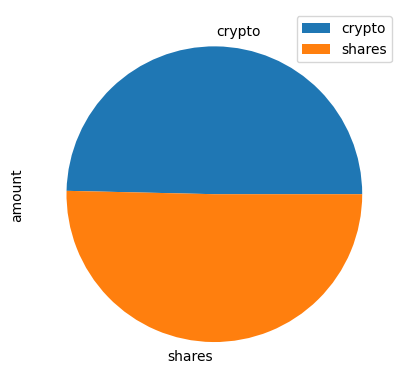

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)
# Calculate total amount of savings

# Validate saving health
if df_savings['amount'].sum() > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif df_savings['amount'].sum() == emergency_fund:
    print("Congratulations! You have reached your financial goal for the emergency fund.")
else:
    shortfall = emergency_fund - df_savings['amount'].sum()
    print(f"You are ${shortfall:.2f} away from reaching your emergency fund goal.")

36000
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-08-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-08-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG


tickers= ["SPY", "AGG"]

df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
df_ticker.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-08-01 04:00:00+00:00,105.55,105.7600,105.512,105.70,4534062,18024,105.682721,AGG
2018-08-02 04:00:00+00:00,105.76,105.7600,105.650,105.74,3671901,13787,105.721750,AGG
2018-08-03 04:00:00+00:00,105.81,105.9799,105.810,105.97,2542872,11998,105.924304,AGG
2018-08-06 04:00:00+00:00,106.03,106.1100,106.000,106.04,4120716,13656,106.067586,AGG
2018-08-07 04:00:00+00:00,105.97,105.9700,105.825,105.85,2532774,9522,105.876672,AGG


In [16]:
# Reorganize the DataFrame
# Separate ticker data

SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data

df_ticker.tail()


SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2023-07-26 04:00:00+00:00  454.47  456.99  453.3800  455.51  71066805   
2023-07-27 04:00:00+00:00  459.02  459.44  451.5500  452.49  92194375   
2023-07-28 04:00:00+00:00  455.88  457.78  452.4918  456.92  79583623   
2023-07-31 04:00:00+00:00  457.41  458.16  456.0450  457.79  62053644   
2023-08-01 04:00:00+00:00  456.27  457.25  455.4900  456.48  55524186   

                                                     AGG                   \
                          trade_count        vwap   open    high      low   
timestamp                                                                   
2023-07-26 04:00:00+00:00      528134  454.998694  97.93  98.065  97.6800   
2023-07-27 04:00:00+00:00      627051  455.321716  97.84  97.930  97.1050   
2023-07-28 04:00:00+00:00      525115  456.262095  97.39  97.590  97.3102   
2023-07-31 04:00:00+00:00      439109  457.175990  97.53  97.800  97.5219   
2023-08-01 04:00:00+00:00      418751  456.478244  97.01  97.090  96.7100   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2023-07-26 04:00:00+00:00  98.02   5907380       26939  97.864847  
2023-07-27 04:00:00+00:00  97.18   6937871       32050  97.400513  
2023-07-28 04:00:00+00:00  97.56   7667973       27237  97.508638  
2023-07-31 04:00:00+00:00  97.68  11079098       31049  97.668431  
2023-08-01 04:00:00+00:00  96.77   8810875       35640  96.817974

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_of_sims = 500

MC_portfolio = MCSimulation(
    portfolio_data= df_ticker,
    num_simulation= num_of_sims,
    weights= [.60,.40],
    num_trading_days= 252*30

)

In [23]:
# Printing the simulation input data
MC_portfolio.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 110.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 120.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 130.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 140.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 150.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 160.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 170.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 180.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 190.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 200.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 210.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 220.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 230.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 240.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 250.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 260.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 270.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 280.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 290.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 300.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 310.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 320.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 330.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 340.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 350.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 360.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 370.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 380.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 390.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 400.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 410.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 420.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 430.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 440.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 450.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 460.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 470.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 480.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

Running Monte Carlo simulation number 490.


c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech bc\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\tfree\Desktop\MIA Fintech b

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002041,1.003138,0.983699,0.989985,1.001558,0.988369,1.004798,0.996512,0.996746,1.014149,...,1.020963,0.999950,0.999225,1.005246,0.993626,0.990408,1.002420,1.007909,1.002512,0.999310
2,0.991062,1.004972,0.990468,0.986981,0.994753,0.992703,1.006599,0.997961,1.006744,1.016402,...,1.021869,0.995300,0.984085,1.007034,0.990979,0.985865,1.007184,1.013915,1.006250,0.982196
3,0.995036,0.997005,0.991466,0.990883,0.996050,0.989425,1.001523,1.006966,1.016746,1.020420,...,1.026313,0.992709,0.988882,0.999939,0.986867,0.982522,1.001249,1.009216,1.013127,0.980743
4,0.987596,0.988807,0.996156,0.988260,0.987038,0.991239,0.991995,0.998206,1.025829,1.024218,...,1.021739,0.999118,0.995098,0.993478,0.980272,0.981693,0.995844,1.016526,1.009669,0.992696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.335904,5.371329,7.370466,5.274817,3.713256,3.293741,2.361958,1.434056,4.676205,1.271604,...,1.746459,2.253530,3.937663,5.292993,3.485077,1.725805,2.242754,3.480741,1.702488,8.650967
7557,4.386432,5.358727,7.396785,5.303609,3.731524,3.285328,2.376947,1.422366,4.658498,1.262580,...,1.747664,2.232246,3.993369,5.270889,3.480596,1.703408,2.251301,3.491160,1.709727,8.608482
7558,4.385668,5.372233,7.388342,5.313384,3.755360,3.284800,2.395230,1.427775,4.692780,1.254503,...,1.738308,2.214013,4.066631,5.217244,3.478575,1.688355,2.253299,3.492823,1.698769,8.614148
7559,4.399602,5.382317,7.405099,5.309017,3.779248,3.298391,2.410066,1.412392,4.764436,1.265604,...,1.704295,2.213475,4.072631,5.165283,3.473805,1.684570,2.230247,3.481395,1.702765,8.666445


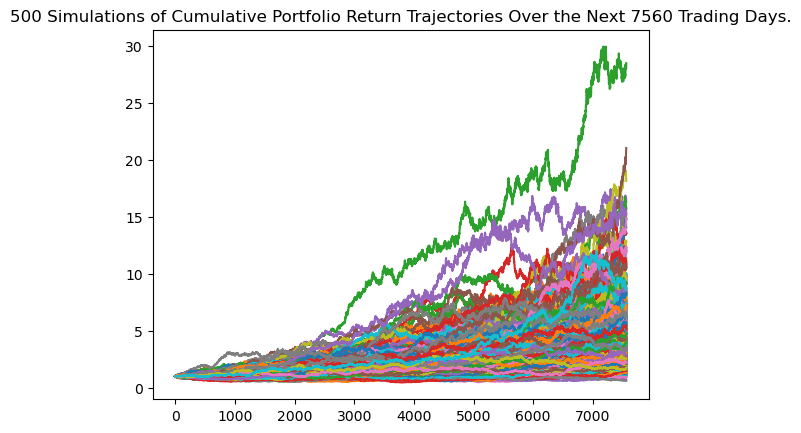

In [24]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_returns_data = {
    "mean": list(MC_portfolio.simulated_return.mean(axis=1)),
    "median": list(MC_portfolio.simulated_return.median(axis=1)),
    "min": list(MC_portfolio.simulated_return.min(axis=1)),
    "max": list(MC_portfolio.simulated_return.max(axis=1))}

# Print summary statistics

df_simulated_returns = pd.DataFrame(simulated_returns_data)
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999943,0.999642,0.979812,1.021442
2,0.999737,0.999081,0.971392,1.036100
3,0.999437,0.998854,0.967398,1.036363
4,0.999598,0.999150,0.957926,1.047586


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(df_simulated_returns[8]*initial_investment,2)
ci_upper = round(df_simulated_returns[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $          mean    median       min        max
0     20000.00  20000.00  20000.00   20000.00
1     19998.86  19992.83  19596.23   20428.83
2     19994.73  19981.63  19427.84   20721.99
3     19988.74  19977.07  19347.97   20727.27
4     19991.97  19982.99  19158.52   20951.72
...        ...       ...       ...        ...
7556  93814.35  78148.74  12089.25  559357.87
7557  93862.50  77312.71  12124.62  560265.41
7558  93912.83  77736.15  12123.48  561548.51
7559  93946.45  77676.43  12310.51  566357.31
7560  93956.68  77979.53  12229.13  569595.80

[7561 rows x 4 columns] and $          mean    median       min        max
0     20000.00  20000.00  20000.00   20000.00
1     19998.86  19992.83  19596.23   20428.83
2     19994.73  19981.63  19427.84   20721.99
3     19988.74  19977.07  19347.97   20727.27
4     19991.97  19982.99  19158.52   20951.72
...       

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(df_simulated_returns[8]*initial_investment,2)
ci_upper = round(df_simulated_returns[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $           mean     median       min        max
0      30000.00   30000.00  30000.00   30000.00
1      29998.29   29989.25  29394.35   30643.25
2      29992.10   29972.44  29141.76   31082.99
3      29983.10   29965.61  29021.95   31090.90
4      29987.95   29974.49  28737.78   31427.58
...         ...        ...       ...        ...
7556  140721.52  117223.11  18133.87  839036.80
7557  140793.75  115969.06  18186.92  840398.11
7558  140869.25  116604.23  18185.22  842322.77
7559  140919.68  116514.64  18465.77  849535.97
7560  140935.01  116969.29  18343.70  854393.70

[7561 rows x 4 columns] and $           mean     median       min        max
0      30000.00   30000.00  30000.00   30000.00
1      29998.29   29989.25  29394.35   30643.25
2      29992.10   29972.44  29141.76   31082.99
3      29983.10   29965.61  29021.95   31090.90
4      29987.95   29

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")